## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - California Dataset 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055
0:	learn: 0.9629179	total: 51.8ms	remaining: 51.7s
1:	learn: 0.9301086	total: 55.5ms	remaining: 27.7s
2:	learn: 0.9005637	total: 59.1ms	remaining: 19.7s
3:	learn: 0.8720983	total: 62.7ms	remaining: 15.6s
4:	learn: 0.8467410	total: 66ms	remaining: 13.1s
5:	learn: 0.8226672	total: 69ms	remaining: 11.4s
6:	learn: 0.7994702	total: 72.3ms	remaining: 10.3s
7:	learn: 0.7784272	total: 75.6ms	remaining: 9.37s
8:	learn: 0.7602192	total: 78.8ms	remaining: 8.68s
9:	learn: 0.7412421	total: 82.2ms	remaining: 8.14s
10:	learn: 0.7247930	total: 85.8ms	remaining: 7.71s
11:	learn: 0.7089951	total: 88.8ms	remaining: 7.31s
12:	learn: 0.6951345	total: 91.9ms	remaining: 6.98s
13:	learn: 0.6809276	total: 95.1ms	remaining: 6.7s
14:	learn: 0.6692630	total: 98ms	remaining: 6.43s
15:	learn: 0.6588323	total: 101ms	remaining: 6.22s
16:	learn: 0.6472700	total: 104ms	remaining: 6.02s
17:	learn: 0.6379982	total: 107ms	remaining: 5.85s
18:	learn: 0.6294674	total: 110ms	remaining: 5.69s
19:

43:	learn: 0.5116444	total: 190ms	remaining: 4.12s
44:	learn: 0.5100547	total: 193ms	remaining: 4.09s
45:	learn: 0.5069096	total: 196ms	remaining: 4.06s
46:	learn: 0.5051685	total: 199ms	remaining: 4.03s
47:	learn: 0.5033968	total: 202ms	remaining: 4s
48:	learn: 0.5012433	total: 205ms	remaining: 3.97s
49:	learn: 0.4986132	total: 212ms	remaining: 4.04s
50:	learn: 0.4968022	total: 215ms	remaining: 4s
51:	learn: 0.4951632	total: 218ms	remaining: 3.97s
52:	learn: 0.4928924	total: 221ms	remaining: 3.95s
53:	learn: 0.4917272	total: 224ms	remaining: 3.93s
54:	learn: 0.4895079	total: 227ms	remaining: 3.9s
55:	learn: 0.4881884	total: 230ms	remaining: 3.88s
56:	learn: 0.4861566	total: 233ms	remaining: 3.86s
57:	learn: 0.4850201	total: 236ms	remaining: 3.84s
58:	learn: 0.4840055	total: 239ms	remaining: 3.82s
59:	learn: 0.4824455	total: 243ms	remaining: 3.8s
60:	learn: 0.4809744	total: 246ms	remaining: 3.78s
61:	learn: 0.4801376	total: 249ms	remaining: 3.77s
62:	learn: 0.4792422	total: 252ms	remai

114:	learn: 0.4407446	total: 378ms	remaining: 2.91s
115:	learn: 0.4402011	total: 380ms	remaining: 2.9s
116:	learn: 0.4398559	total: 382ms	remaining: 2.88s
117:	learn: 0.4392990	total: 384ms	remaining: 2.87s
118:	learn: 0.4389153	total: 387ms	remaining: 2.86s
119:	learn: 0.4383331	total: 389ms	remaining: 2.85s
120:	learn: 0.4378136	total: 391ms	remaining: 2.84s
121:	learn: 0.4375553	total: 393ms	remaining: 2.83s
122:	learn: 0.4369995	total: 395ms	remaining: 2.82s
123:	learn: 0.4366325	total: 398ms	remaining: 2.81s
124:	learn: 0.4362823	total: 400ms	remaining: 2.8s
125:	learn: 0.4359535	total: 402ms	remaining: 2.79s
126:	learn: 0.4353142	total: 404ms	remaining: 2.78s
127:	learn: 0.4349006	total: 406ms	remaining: 2.77s
128:	learn: 0.4345032	total: 408ms	remaining: 2.76s
129:	learn: 0.4342397	total: 411ms	remaining: 2.75s
130:	learn: 0.4336159	total: 413ms	remaining: 2.74s
131:	learn: 0.4332421	total: 415ms	remaining: 2.73s
132:	learn: 0.4327744	total: 417ms	remaining: 2.72s
133:	learn: 0.

199:	learn: 0.4048806	total: 563ms	remaining: 2.25s
200:	learn: 0.4045677	total: 566ms	remaining: 2.25s
201:	learn: 0.4042827	total: 568ms	remaining: 2.24s
202:	learn: 0.4039321	total: 570ms	remaining: 2.24s
203:	learn: 0.4035710	total: 572ms	remaining: 2.23s
204:	learn: 0.4032014	total: 574ms	remaining: 2.23s
205:	learn: 0.4028403	total: 576ms	remaining: 2.22s
206:	learn: 0.4026620	total: 579ms	remaining: 2.22s
207:	learn: 0.4023063	total: 581ms	remaining: 2.21s
208:	learn: 0.4019681	total: 583ms	remaining: 2.21s
209:	learn: 0.4017582	total: 585ms	remaining: 2.2s
210:	learn: 0.4014565	total: 587ms	remaining: 2.19s
211:	learn: 0.4011868	total: 589ms	remaining: 2.19s
212:	learn: 0.4008287	total: 592ms	remaining: 2.19s
213:	learn: 0.4005210	total: 594ms	remaining: 2.18s
214:	learn: 0.4002274	total: 596ms	remaining: 2.18s
215:	learn: 0.3998919	total: 598ms	remaining: 2.17s
216:	learn: 0.3994781	total: 600ms	remaining: 2.17s
217:	learn: 0.3992639	total: 602ms	remaining: 2.16s
218:	learn: 0

284:	learn: 0.3830010	total: 750ms	remaining: 1.88s
285:	learn: 0.3826742	total: 752ms	remaining: 1.88s
286:	learn: 0.3824534	total: 755ms	remaining: 1.87s
287:	learn: 0.3821767	total: 757ms	remaining: 1.87s
288:	learn: 0.3819748	total: 759ms	remaining: 1.87s
289:	learn: 0.3817667	total: 761ms	remaining: 1.86s
290:	learn: 0.3815253	total: 763ms	remaining: 1.86s
291:	learn: 0.3813529	total: 766ms	remaining: 1.86s
292:	learn: 0.3812172	total: 768ms	remaining: 1.85s
293:	learn: 0.3809978	total: 770ms	remaining: 1.85s
294:	learn: 0.3807825	total: 772ms	remaining: 1.84s
295:	learn: 0.3805940	total: 774ms	remaining: 1.84s
296:	learn: 0.3801959	total: 776ms	remaining: 1.84s
297:	learn: 0.3799439	total: 779ms	remaining: 1.83s
298:	learn: 0.3797228	total: 781ms	remaining: 1.83s
299:	learn: 0.3795554	total: 783ms	remaining: 1.83s
300:	learn: 0.3793733	total: 785ms	remaining: 1.82s
301:	learn: 0.3791607	total: 787ms	remaining: 1.82s
302:	learn: 0.3789297	total: 790ms	remaining: 1.82s
303:	learn: 

369:	learn: 0.3671985	total: 937ms	remaining: 1.59s
370:	learn: 0.3670563	total: 939ms	remaining: 1.59s
371:	learn: 0.3669128	total: 941ms	remaining: 1.59s
372:	learn: 0.3668381	total: 944ms	remaining: 1.59s
373:	learn: 0.3666564	total: 946ms	remaining: 1.58s
374:	learn: 0.3663789	total: 948ms	remaining: 1.58s
375:	learn: 0.3661576	total: 950ms	remaining: 1.58s
376:	learn: 0.3659742	total: 953ms	remaining: 1.57s
377:	learn: 0.3658330	total: 955ms	remaining: 1.57s
378:	learn: 0.3656680	total: 957ms	remaining: 1.57s
379:	learn: 0.3654606	total: 960ms	remaining: 1.56s
380:	learn: 0.3651842	total: 962ms	remaining: 1.56s
381:	learn: 0.3650538	total: 964ms	remaining: 1.56s
382:	learn: 0.3649246	total: 966ms	remaining: 1.56s
383:	learn: 0.3647854	total: 969ms	remaining: 1.55s
384:	learn: 0.3646814	total: 971ms	remaining: 1.55s
385:	learn: 0.3645091	total: 973ms	remaining: 1.55s
386:	learn: 0.3643695	total: 976ms	remaining: 1.54s
387:	learn: 0.3641687	total: 978ms	remaining: 1.54s
388:	learn: 

446:	learn: 0.3553048	total: 1.12s	remaining: 1.39s
447:	learn: 0.3550824	total: 1.13s	remaining: 1.39s
448:	learn: 0.3549146	total: 1.13s	remaining: 1.39s
449:	learn: 0.3548607	total: 1.13s	remaining: 1.38s
450:	learn: 0.3546809	total: 1.13s	remaining: 1.38s
451:	learn: 0.3545787	total: 1.14s	remaining: 1.38s
452:	learn: 0.3544310	total: 1.14s	remaining: 1.37s
453:	learn: 0.3543210	total: 1.14s	remaining: 1.37s
454:	learn: 0.3541744	total: 1.14s	remaining: 1.37s
455:	learn: 0.3540636	total: 1.15s	remaining: 1.37s
456:	learn: 0.3538004	total: 1.15s	remaining: 1.36s
457:	learn: 0.3536614	total: 1.15s	remaining: 1.36s
458:	learn: 0.3534477	total: 1.15s	remaining: 1.36s
459:	learn: 0.3533592	total: 1.15s	remaining: 1.35s
460:	learn: 0.3532754	total: 1.16s	remaining: 1.35s
461:	learn: 0.3531467	total: 1.16s	remaining: 1.35s
462:	learn: 0.3529963	total: 1.16s	remaining: 1.35s
463:	learn: 0.3529036	total: 1.16s	remaining: 1.34s
464:	learn: 0.3527831	total: 1.17s	remaining: 1.34s
465:	learn: 

528:	learn: 0.3442153	total: 1.31s	remaining: 1.17s
529:	learn: 0.3441108	total: 1.32s	remaining: 1.17s
530:	learn: 0.3439546	total: 1.32s	remaining: 1.16s
531:	learn: 0.3438254	total: 1.32s	remaining: 1.16s
532:	learn: 0.3437049	total: 1.32s	remaining: 1.16s
533:	learn: 0.3435053	total: 1.32s	remaining: 1.16s
534:	learn: 0.3433236	total: 1.33s	remaining: 1.15s
535:	learn: 0.3432219	total: 1.33s	remaining: 1.15s
536:	learn: 0.3431615	total: 1.33s	remaining: 1.15s
537:	learn: 0.3430198	total: 1.33s	remaining: 1.15s
538:	learn: 0.3429422	total: 1.34s	remaining: 1.14s
539:	learn: 0.3428024	total: 1.34s	remaining: 1.14s
540:	learn: 0.3426641	total: 1.34s	remaining: 1.14s
541:	learn: 0.3425885	total: 1.34s	remaining: 1.14s
542:	learn: 0.3424695	total: 1.35s	remaining: 1.13s
543:	learn: 0.3423997	total: 1.35s	remaining: 1.13s
544:	learn: 0.3422315	total: 1.35s	remaining: 1.13s
545:	learn: 0.3421242	total: 1.35s	remaining: 1.13s
546:	learn: 0.3419673	total: 1.35s	remaining: 1.12s
547:	learn: 

611:	learn: 0.3351716	total: 1.5s	remaining: 952ms
612:	learn: 0.3351155	total: 1.5s	remaining: 950ms
613:	learn: 0.3350041	total: 1.51s	remaining: 947ms
614:	learn: 0.3349098	total: 1.51s	remaining: 944ms
615:	learn: 0.3348304	total: 1.51s	remaining: 942ms
616:	learn: 0.3347009	total: 1.51s	remaining: 939ms
617:	learn: 0.3346458	total: 1.51s	remaining: 937ms
618:	learn: 0.3345381	total: 1.52s	remaining: 934ms
619:	learn: 0.3344101	total: 1.52s	remaining: 931ms
620:	learn: 0.3343267	total: 1.52s	remaining: 929ms
621:	learn: 0.3342275	total: 1.52s	remaining: 926ms
622:	learn: 0.3341456	total: 1.53s	remaining: 924ms
623:	learn: 0.3340640	total: 1.53s	remaining: 921ms
624:	learn: 0.3339122	total: 1.53s	remaining: 919ms
625:	learn: 0.3337503	total: 1.53s	remaining: 916ms
626:	learn: 0.3336593	total: 1.53s	remaining: 914ms
627:	learn: 0.3335713	total: 1.54s	remaining: 911ms
628:	learn: 0.3333915	total: 1.54s	remaining: 908ms
629:	learn: 0.3333158	total: 1.54s	remaining: 906ms
630:	learn: 0.

692:	learn: 0.3272088	total: 1.69s	remaining: 749ms
693:	learn: 0.3271216	total: 1.69s	remaining: 746ms
694:	learn: 0.3270566	total: 1.7s	remaining: 744ms
695:	learn: 0.3269516	total: 1.7s	remaining: 742ms
696:	learn: 0.3267980	total: 1.7s	remaining: 740ms
697:	learn: 0.3266887	total: 1.7s	remaining: 738ms
698:	learn: 0.3265888	total: 1.71s	remaining: 736ms
699:	learn: 0.3265229	total: 1.71s	remaining: 733ms
700:	learn: 0.3264350	total: 1.71s	remaining: 731ms
701:	learn: 0.3263223	total: 1.72s	remaining: 729ms
702:	learn: 0.3262539	total: 1.72s	remaining: 727ms
703:	learn: 0.3261258	total: 1.72s	remaining: 725ms
704:	learn: 0.3260520	total: 1.73s	remaining: 723ms
705:	learn: 0.3259475	total: 1.73s	remaining: 720ms
706:	learn: 0.3258911	total: 1.73s	remaining: 718ms
707:	learn: 0.3257903	total: 1.74s	remaining: 716ms
708:	learn: 0.3256952	total: 1.74s	remaining: 714ms
709:	learn: 0.3255982	total: 1.74s	remaining: 712ms
710:	learn: 0.3255301	total: 1.75s	remaining: 710ms
711:	learn: 0.32

751:	learn: 0.3219897	total: 1.88s	remaining: 620ms
752:	learn: 0.3218990	total: 1.88s	remaining: 618ms
753:	learn: 0.3218179	total: 1.89s	remaining: 615ms
754:	learn: 0.3217323	total: 1.89s	remaining: 613ms
755:	learn: 0.3216617	total: 1.89s	remaining: 611ms
756:	learn: 0.3216090	total: 1.9s	remaining: 608ms
757:	learn: 0.3215306	total: 1.9s	remaining: 606ms
758:	learn: 0.3214274	total: 1.9s	remaining: 604ms
759:	learn: 0.3212014	total: 1.91s	remaining: 602ms
760:	learn: 0.3211190	total: 1.91s	remaining: 600ms
761:	learn: 0.3210312	total: 1.91s	remaining: 597ms
762:	learn: 0.3209495	total: 1.92s	remaining: 595ms
763:	learn: 0.3208564	total: 1.92s	remaining: 593ms
764:	learn: 0.3207911	total: 1.92s	remaining: 590ms
765:	learn: 0.3206643	total: 1.93s	remaining: 588ms
766:	learn: 0.3205891	total: 1.93s	remaining: 586ms
767:	learn: 0.3204765	total: 1.93s	remaining: 584ms
768:	learn: 0.3203840	total: 1.94s	remaining: 581ms
769:	learn: 0.3203086	total: 1.94s	remaining: 579ms
770:	learn: 0.3

814:	learn: 0.3164726	total: 2.07s	remaining: 470ms
815:	learn: 0.3164087	total: 2.07s	remaining: 467ms
816:	learn: 0.3163590	total: 2.07s	remaining: 465ms
817:	learn: 0.3162644	total: 2.08s	remaining: 462ms
818:	learn: 0.3161739	total: 2.08s	remaining: 460ms
819:	learn: 0.3160986	total: 2.08s	remaining: 457ms
820:	learn: 0.3159951	total: 2.08s	remaining: 455ms
821:	learn: 0.3159403	total: 2.09s	remaining: 452ms
822:	learn: 0.3158160	total: 2.09s	remaining: 450ms
823:	learn: 0.3157523	total: 2.09s	remaining: 447ms
824:	learn: 0.3156673	total: 2.1s	remaining: 445ms
825:	learn: 0.3156288	total: 2.1s	remaining: 442ms
826:	learn: 0.3155257	total: 2.1s	remaining: 439ms
827:	learn: 0.3154546	total: 2.1s	remaining: 437ms
828:	learn: 0.3153664	total: 2.1s	remaining: 434ms
829:	learn: 0.3152896	total: 2.11s	remaining: 432ms
830:	learn: 0.3152050	total: 2.11s	remaining: 429ms
831:	learn: 0.3151385	total: 2.11s	remaining: 427ms
832:	learn: 0.3150922	total: 2.12s	remaining: 424ms
833:	learn: 0.314

891:	learn: 0.3106139	total: 2.26s	remaining: 273ms
892:	learn: 0.3105421	total: 2.26s	remaining: 271ms
893:	learn: 0.3104659	total: 2.26s	remaining: 268ms
894:	learn: 0.3104028	total: 2.26s	remaining: 266ms
895:	learn: 0.3103186	total: 2.27s	remaining: 263ms
896:	learn: 0.3102488	total: 2.27s	remaining: 260ms
897:	learn: 0.3101565	total: 2.27s	remaining: 258ms
898:	learn: 0.3100955	total: 2.27s	remaining: 255ms
899:	learn: 0.3100512	total: 2.27s	remaining: 253ms
900:	learn: 0.3100138	total: 2.28s	remaining: 250ms
901:	learn: 0.3099635	total: 2.28s	remaining: 248ms
902:	learn: 0.3098989	total: 2.28s	remaining: 245ms
903:	learn: 0.3098084	total: 2.28s	remaining: 243ms
904:	learn: 0.3097402	total: 2.29s	remaining: 240ms
905:	learn: 0.3096378	total: 2.29s	remaining: 237ms
906:	learn: 0.3095878	total: 2.29s	remaining: 235ms
907:	learn: 0.3095154	total: 2.29s	remaining: 232ms
908:	learn: 0.3094688	total: 2.29s	remaining: 230ms
909:	learn: 0.3093784	total: 2.3s	remaining: 227ms
910:	learn: 0

974:	learn: 0.3045983	total: 2.44s	remaining: 62.7ms
975:	learn: 0.3044944	total: 2.45s	remaining: 60.2ms
976:	learn: 0.3044431	total: 2.45s	remaining: 57.7ms
977:	learn: 0.3043959	total: 2.45s	remaining: 55.1ms
978:	learn: 0.3043249	total: 2.45s	remaining: 52.6ms
979:	learn: 0.3042644	total: 2.46s	remaining: 50.1ms
980:	learn: 0.3042142	total: 2.46s	remaining: 47.6ms
981:	learn: 0.3041509	total: 2.46s	remaining: 45.1ms
982:	learn: 0.3041077	total: 2.46s	remaining: 42.6ms
983:	learn: 0.3040665	total: 2.46s	remaining: 40.1ms
984:	learn: 0.3040237	total: 2.47s	remaining: 37.6ms
985:	learn: 0.3039532	total: 2.47s	remaining: 35.1ms
986:	learn: 0.3038723	total: 2.47s	remaining: 32.5ms
987:	learn: 0.3038141	total: 2.47s	remaining: 30ms
988:	learn: 0.3037455	total: 2.48s	remaining: 27.5ms
989:	learn: 0.3036820	total: 2.48s	remaining: 25ms
990:	learn: 0.3036165	total: 2.48s	remaining: 22.5ms
991:	learn: 0.3035759	total: 2.48s	remaining: 20ms
992:	learn: 0.3035124	total: 2.48s	remaining: 17.5ms

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [10]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.1, betas=(0.5, 0.999))

In [11]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [12]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
8.665157368029556


#### Sanity Checks 

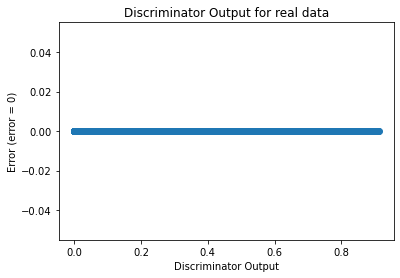

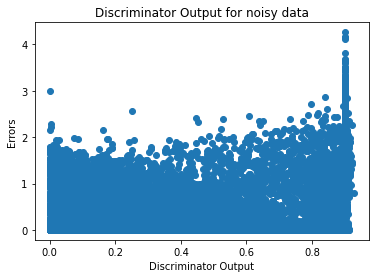

In [13]:
sanityChecks.discProbVsError(real_dataset,disc,device)